## Project Info

**Project Name - Machine Downtime**

**Objective** - Minimize unplanned machine downtime


## Dataset Loading

In [ ]:
# importing necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataframe
df = pd.read_csv(r"/content/drive/MyDrive/Machine_Downtime_Data.csv")

In [ ]:
df_not_cleaned = df.copy()

In [ ]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
df.tail()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure
2499,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,96.690000,5.936610,7.109355,29.8,53.2,36.2,0.840,31.580,23576.0,385.0,24.409551,3.55,Machine_Failure


In [ ]:
df.shape # shape of dataframe

(2500, 16)

## Data Pre-processing

In [ ]:
df.info()   # Info about each column ( Null values, count, Datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [ ]:
df.dtypes # Data Type of columns of dataframe

Date                                object
Machine_ID                          object
Assembly_Line_No                    object
Hydraulic_Pressure(bar)            float64
Coolant_Pressure(bar)              float64
Air_System_Pressure(bar)           float64
Coolant_Temperature                float64
Hydraulic_Oil_Temperature(°C)      float64
Spindle_Bearing_Temperature(°C)    float64
Spindle_Vibration(µm)              float64
Tool_Vibration(µm)                 float64
Spindle_Speed(RPM)                 float64
Voltage(volts)                     float64
Torque(Nm)                         float64
Cutting(kN)                        float64
Downtime                            object
dtype: object

**Handling null values**

In [ ]:
df.isnull().sum() # sum of null values in each column

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [ ]:
df.describe()   # Statistical Summary of data

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [ ]:
df.dropna(inplace=True) # Dropping  all null values from data

In [ ]:
df.info()  # As we see all null values are removed

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2381 non-null   object 
 1   Machine_ID                       2381 non-null   object 
 2   Assembly_Line_No                 2381 non-null   object 
 3   Hydraulic_Pressure(bar)          2381 non-null   float64
 4   Coolant_Pressure(bar)            2381 non-null   float64
 5   Air_System_Pressure(bar)         2381 non-null   float64
 6   Coolant_Temperature              2381 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2381 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2381 non-null   float64
 9   Spindle_Vibration(µm)            2381 non-null   float64
 10  Tool_Vibration(µm)               2381 non-null   float64
 11  Spindle_Speed(RPM)               2381 non-null   float64
 12  Voltage(volts)           

In [ ]:
df.isnull().sum() # Verify if null values are dropped

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

**Changing Data Types**

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # Changing data type as datetime

<ipython-input-17-733d40c01a5a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']) # Changing data type as datetime


In [ ]:
df.dtypes # Verify data types

Date                               datetime64[ns]
Machine_ID                                 object
Assembly_Line_No                           object
Hydraulic_Pressure(bar)                   float64
Coolant_Pressure(bar)                     float64
Air_System_Pressure(bar)                  float64
Coolant_Temperature                       float64
Hydraulic_Oil_Temperature(°C)             float64
Spindle_Bearing_Temperature(°C)           float64
Spindle_Vibration(µm)                     float64
Tool_Vibration(µm)                        float64
Spindle_Speed(RPM)                        float64
Voltage(volts)                            float64
Torque(Nm)                                float64
Cutting(kN)                               float64
Downtime                                   object
dtype: object

In [ ]:
df['Downtime'] = df['Downtime'].astype('category') # Changing data type as category

In [ ]:
df.dtypes # Verify data type

Date                               datetime64[ns]
Machine_ID                                 object
Assembly_Line_No                           object
Hydraulic_Pressure(bar)                   float64
Coolant_Pressure(bar)                     float64
Air_System_Pressure(bar)                  float64
Coolant_Temperature                       float64
Hydraulic_Oil_Temperature(°C)             float64
Spindle_Bearing_Temperature(°C)           float64
Spindle_Vibration(µm)                     float64
Tool_Vibration(µm)                        float64
Spindle_Speed(RPM)                        float64
Voltage(volts)                            float64
Torque(Nm)                                float64
Cutting(kN)                               float64
Downtime                                 category
dtype: object

**Check for Duplicate Values**

In [ ]:
df.duplicated().sum() # Checking duplicated values

0

**Extracting Numerical Columns**

In [ ]:
df_float = df.select_dtypes(include='float') # DataFrame of float data type columns

In [ ]:
list_of_numerical=list(df_float.columns) # List of float data type parameters
list_of_numerical

['Hydraulic_Pressure(bar)',
 'Coolant_Pressure(bar)',
 'Air_System_Pressure(bar)',
 'Coolant_Temperature',
 'Hydraulic_Oil_Temperature(°C)',
 'Spindle_Bearing_Temperature(°C)',
 'Spindle_Vibration(µm)',
 'Tool_Vibration(µm)',
 'Spindle_Speed(RPM)',
 'Voltage(volts)',
 'Torque(Nm)',
 'Cutting(kN)']

**Outlier Detection**

In [ ]:

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return outliers

numerical_data = df[list_of_numerical]
outliers_iqr = detect_outliers_iqr(numerical_data)
print(f"No of outliers: {outliers_iqr.sum()}")

No of outliers: 105


In [ ]:
# Dataset without outliers
df_cleaned=df[~outliers_iqr]
df_cleaned

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,131.894307,5.221555,6.573392,22.4,45.5,32.5,1.276,23.430,20978.0,390.0,22.757270,2.94,No_Machine_Failure
2495,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2498,2022-02-01,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


## Exploratory Data Analysis

**1)First Moment Business Decision**

*Measure of Central Tendancy*

In [ ]:
# Mean of numerical columns only for cleaned dataset
df_cleaned.select_dtypes(include='number').mean()

Hydraulic_Pressure(bar)              101.251094
Coolant_Pressure(bar)                  4.950956
Air_System_Pressure(bar)               6.501377
Coolant_Temperature                   18.538796
Hydraulic_Oil_Temperature(°C)         47.604042
Spindle_Bearing_Temperature(°C)       35.091564
Spindle_Vibration(µm)                  1.009214
Tool_Vibration(µm)                    25.390486
Spindle_Speed(RPM)                 20337.693322
Voltage(volts)                       349.385764
Torque(Nm)                            25.234097
Cutting(kN)                            2.785004
dtype: float64

In [ ]:
# Mean of numerical columns only for not cleaned dataset
df_not_cleaned.select_dtypes(include='number').mean()

Hydraulic_Pressure(bar)              101.409084
Coolant_Pressure(bar)                  4.947058
Air_System_Pressure(bar)               6.499275
Coolant_Temperature                   18.559887
Hydraulic_Oil_Temperature(°C)         47.618317
Spindle_Bearing_Temperature(°C)       35.063698
Spindle_Vibration(µm)                  1.009334
Tool_Vibration(µm)                    25.411975
Spindle_Speed(RPM)                 20274.792302
Voltage(volts)                       348.996792
Torque(Nm)                            25.234968
Cutting(kN)                            2.782551
dtype: float64

Insights:
*  The comparison of mean values between the cleaned and uncleaned datasets reveals that the data cleaning process maintained the overall data integrity while potentially removing a few outliers.
*  The small differences observed indicate that the key parameters remained consistent, providing confidence in the reliability of the cleaned data for further analysis.

In [ ]:
# Median for clean dataset
df_cleaned.select_dtypes(include='number').median()

Hydraulic_Pressure(bar)               96.137183
Coolant_Pressure(bar)                  4.940232
Air_System_Pressure(bar)               6.505645
Coolant_Temperature                   21.200000
Hydraulic_Oil_Temperature(°C)         47.600000
Spindle_Bearing_Temperature(°C)       35.100000
Spindle_Vibration(µm)                  1.010500
Tool_Vibration(µm)                    25.376000
Spindle_Speed(RPM)                 20150.000000
Voltage(volts)                       349.000000
Torque(Nm)                            24.664290
Cutting(kN)                            2.770000
dtype: float64

In [ ]:
# Median for not clean dataset
df_not_cleaned.select_dtypes(include='number').median()

Hydraulic_Pressure(bar)               96.763486
Coolant_Pressure(bar)                  4.939960
Air_System_Pressure(bar)               6.505191
Coolant_Temperature                   21.200000
Hydraulic_Oil_Temperature(°C)         47.700000
Spindle_Bearing_Temperature(°C)       35.100000
Spindle_Vibration(µm)                  1.008000
Tool_Vibration(µm)                    25.455000
Spindle_Speed(RPM)                 20137.500000
Voltage(volts)                       349.000000
Torque(Nm)                            24.647736
Cutting(kN)                            2.780000
dtype: float64

** From median output confirm that the machine operates within stable parameters based on the median values, ensuring consistent performance across various operational aspects. This stability is crucial for maintaining productivity and minimizing unexpected variations in machine performance. **

In [ ]:
# Mode for clean dataset
df_cleaned.select_dtypes(include='number').mode()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,88.279134,6.893182,5.628717,25.6,48.0,34.6,1.231,26.736,17726.0,337.0,35.580334,3.55
1,NaN,NaN,5.928643,NaN,NaN,NaN,NaN,30.585,NaN,NaN,NaN,NaN
2,NaN,NaN,5.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6.011483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6.167549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,6.430073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,6.753560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6.836188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,6.875058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6.940606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mode for not clean dataset
df_not_cleaned.select_dtypes(include='number').mode()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
0,88.279134,4.566854,5.628717,26.4,47.5,34.6,1.231,26.736,17726.0,337.0,35.580334,3.55
1,89.458747,4.842521,5.928643,NaN,48.0,NaN,NaN,30.585,NaN,NaN,NaN,3.67
2,90.458747,5.567857,5.955235,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.918357,6.011483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,6.560332,6.167549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,6.839413,6.430073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,6.863944,6.668245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,6.893182,6.753560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,6.836188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6.875058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2)Second Moment Business Decision**

*Measure of Dispersion*

In [ ]:
# Dispersion for not cleaned dataset
df_not_cleaned.select_dtypes(include='number').var()

Hydraulic_Pressure(bar)            9.174417e+02
Coolant_Pressure(bar)              9.947213e-01
Air_System_Pressure(bar)           1.658765e-01
Coolant_Temperature                7.317912e+01
Hydraulic_Oil_Temperature(°C)      1.420291e+01
Spindle_Bearing_Temperature(°C)    1.417389e+01
Spindle_Vibration(µm)              1.175791e-01
Tool_Vibration(µm)                 4.143679e+01
Spindle_Speed(RPM)                 1.484299e+07
Voltage(volts)                     2.058984e+03
Torque(Nm)                         3.768196e+01
Cutting(kN)                        3.803044e-01
dtype: float64

** attention should be given to high hydraulic pressure, low coolant pressure, high spindle speed, and unusually high voltage values in the uncleaned dataset. Addressing these could improve operational efficiency, reduce risks, and ensure consistent performance.**

In [ ]:
# Dispersion for cleaned dataset
df_cleaned.select_dtypes(include='number').var()

Hydraulic_Pressure(bar)            9.144788e+02
Coolant_Pressure(bar)              9.623868e-01
Air_System_Pressure(bar)           1.554846e-01
Coolant_Temperature                6.952634e+01
Hydraulic_Oil_Temperature(°C)      1.317413e+01
Spindle_Bearing_Temperature(°C)    1.351983e+01
Spindle_Vibration(µm)              1.114144e-01
Tool_Vibration(µm)                 3.981402e+01
Spindle_Speed(RPM)                 1.365495e+07
Voltage(volts)                     1.968227e+03
Torque(Nm)                         3.700146e+01
Cutting(kN)                        3.791617e-01
dtype: float64

Insights:

*    The cleaned dataset shows improvements in coolant system efficiency, possibly more stable temperature regulation, and potentially optimized spindle performance.

*    However, there are notable increases in tool vibration and spindle speed, which may indicate adjustments or changes in operational conditions post-cleaning.

*    Attention to these parameters ensures continued optimal performance and reliability of the machine.

In [ ]:
# Standard Deviation for not cleaned dataset
df_not_cleaned.select_dtypes(include='number').std()

Hydraulic_Pressure(bar)              30.289301
Coolant_Pressure(bar)                 0.997357
Air_System_Pressure(bar)              0.407279
Coolant_Temperature                   8.554480
Hydraulic_Oil_Temperature(°C)         3.768674
Spindle_Bearing_Temperature(°C)       3.764823
Spindle_Vibration(µm)                 0.342898
Tool_Vibration(µm)                    6.437142
Spindle_Speed(RPM)                 3852.660056
Voltage(volts)                       45.376024
Torque(Nm)                            6.138564
Cutting(kN)                           0.616688
dtype: float64

In [ ]:
# Standard Deviation for cleaned dataset
df_cleaned.select_dtypes(include='number').std()

Hydraulic_Pressure(bar)              30.240350
Coolant_Pressure(bar)                 0.981013
Air_System_Pressure(bar)              0.394315
Coolant_Temperature                   8.338246
Hydraulic_Oil_Temperature(°C)         3.629618
Spindle_Bearing_Temperature(°C)       3.676932
Spindle_Vibration(µm)                 0.333788
Tool_Vibration(µm)                    6.309836
Spindle_Speed(RPM)                 3695.260168
Voltage(volts)                       44.364699
Torque(Nm)                            6.082882
Cutting(kN)                           0.615761
dtype: float64


Insights:
*   The consistent standard deviation values between the cleaned and uncleaned datasets suggest that while the central tendencies (medians) remain similar after cleaning, there are inherent fluctuations in operational parameters.
*   These insights can help in understanding the range of variability in machine performance and guide maintenance or optimization efforts to ensure consistent and reliable operation.




**3)Third Moment Business Decision**

*Skewness*

In [ ]:
# Skewness for not cleaned dataset
df_not_cleaned.select_dtypes(include='number').skew()

Hydraulic_Pressure(bar)            0.197076
Coolant_Pressure(bar)              0.147081
Air_System_Pressure(bar)          -0.052899
Coolant_Temperature                0.108301
Hydraulic_Oil_Temperature(°C)     -0.002291
Spindle_Bearing_Temperature(°C)   -0.035942
Spindle_Vibration(µm)              0.001532
Tool_Vibration(µm)                -0.061005
Spindle_Speed(RPM)                -0.172475
Voltage(volts)                    -0.028658
Torque(Nm)                         0.030578
Cutting(kN)                        0.113963
dtype: float64

In [ ]:
# Skewness for cleaned dataset
df_cleaned.select_dtypes(include='number').skew()

Hydraulic_Pressure(bar)            0.230020
Coolant_Pressure(bar)             -0.013368
Air_System_Pressure(bar)          -0.050728
Coolant_Temperature               -0.225351
Hydraulic_Oil_Temperature(°C)     -0.043435
Spindle_Bearing_Temperature(°C)   -0.040168
Spindle_Vibration(µm)              0.022753
Tool_Vibration(µm)                -0.023960
Spindle_Speed(RPM)                 0.222680
Voltage(volts)                    -0.021838
Torque(Nm)                         0.034658
Cutting(kN)                        0.121719
dtype: float64

<ipython-input-41-55a41ba1758a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Cutting(kN)'], shade=True)


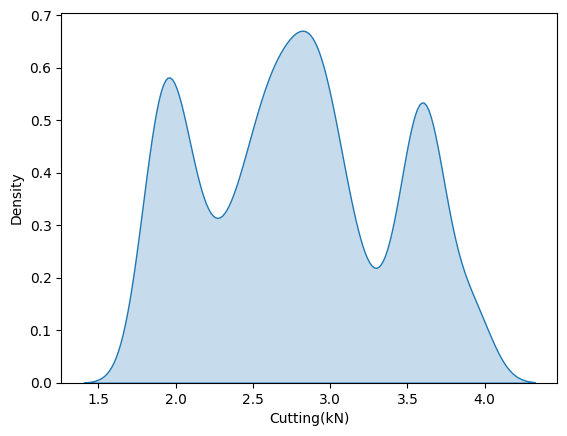

In [ ]:
sns.kdeplot(df_cleaned['Cutting(kN)'], shade=True)
plt.show()

<ipython-input-42-1d661c52467d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Torque(Nm)'], shade=True)


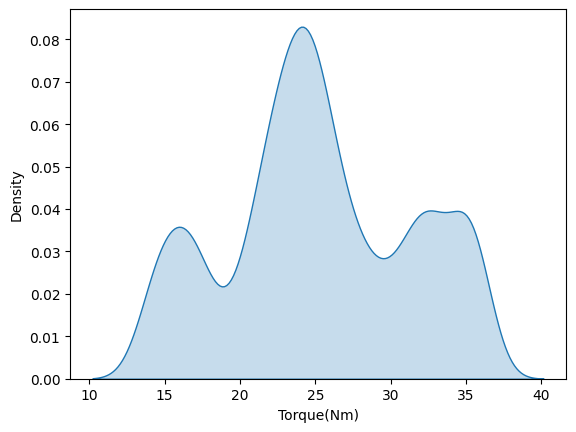

In [ ]:
sns.kdeplot(df_cleaned['Torque(Nm)'], shade=True)
plt.show()

<ipython-input-43-2d2c2a5481a9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Hydraulic_Pressure(bar)'], shade=True)


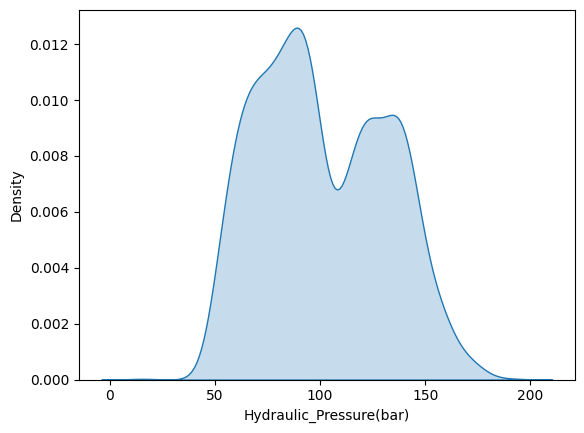

In [ ]:
sns.kdeplot(df_cleaned['Hydraulic_Pressure(bar)'], shade=True)
plt.show()


Insights:
*  Parameters like hydraulic pressure, spindle speed, and cutting force show some degree of skewness, indicating non-normal distributions.

*  Other parameters such as coolant pressure, coolant temperature, and voltage exhibit nearly symmetrical distributions.

*  Understanding skewness helps in assessing the distribution shape and can guide further analysis or adjustments in operational settings.




**4)Fourth Moment Business Decision**

*Kurtosis*

In [ ]:
# Kurtosis for not cleaned dataset
df_not_cleaned.select_dtypes(include='number').kurt()

Hydraulic_Pressure(bar)           -0.920292
Coolant_Pressure(bar)              1.169455
Air_System_Pressure(bar)          -0.001578
Coolant_Temperature                1.564639
Hydraulic_Oil_Temperature(°C)      0.038164
Spindle_Bearing_Temperature(°C)   -0.043862
Spindle_Vibration(µm)             -0.018718
Tool_Vibration(µm)                 0.006451
Spindle_Speed(RPM)                 1.344769
Voltage(volts)                    -0.090328
Torque(Nm)                        -0.465628
Cutting(kN)                       -1.087171
dtype: float64

In [ ]:
# Kurtosis for cleaned dataset
df_cleaned.select_dtypes(include='number').kurt()

Hydraulic_Pressure(bar)           -0.977628
Coolant_Pressure(bar)             -0.144100
Air_System_Pressure(bar)          -0.298567
Coolant_Temperature               -1.357210
Hydraulic_Oil_Temperature(°C)     -0.254329
Spindle_Bearing_Temperature(°C)   -0.314081
Spindle_Vibration(µm)             -0.258408
Tool_Vibration(µm)                -0.266246
Spindle_Speed(RPM)                -0.444120
Voltage(volts)                    -0.244124
Torque(Nm)                        -0.828445
Cutting(kN)                       -1.074638
dtype: float64


Insights:
1.   Most parameters exhibit platykurtic distributions, indicating they are less peaked and have lighter tails compared to a normal distribution.

2.   Coolant temperature and cutting force exhibit leptokurtic distributions, suggesting they are more peaked and have heavier tails.

3.   Understanding kurtosis helps in assessing the shape of the distribution and can provide insights into the variability and potential outliers in the data.




## Data Visualization ##

**Correlation of Variables**

In [ ]:
# Encode the Downtime column
df['Downtime_Encoded'] = df['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

# Calculate correlation coefficients
correlations = df[list_of_numerical + ['Downtime_Encoded']].corr()['Downtime_Encoded']

# Get the top 6 correlated variables with the dependent variable
top_6_correlated = correlations.abs().sort_values(ascending=False).iloc[1:7]
top_6_correlated

Hydraulic_Pressure(bar)    0.553139
Cutting(kN)                0.453852
Torque(Nm)                 0.410595
Spindle_Speed(RPM)         0.273018
Coolant_Temperature        0.173366
Coolant_Pressure(bar)      0.170983
Name: Downtime_Encoded, dtype: float64

Insights:



*   These variables show the strength and direction of their linear relationship with Cutting Force.

*   Hydraulic Pressure has the strongest positive correlation, suggesting that as Hydraulic Pressure increases, Cutting Force tends to increase as well.

*   Torque and Spindle Speed also show positive correlations, though weaker than Hydraulic Pressure.

*   Coolant Temperature and Coolant Pressure have weaker positive correlations with Cutting Force.



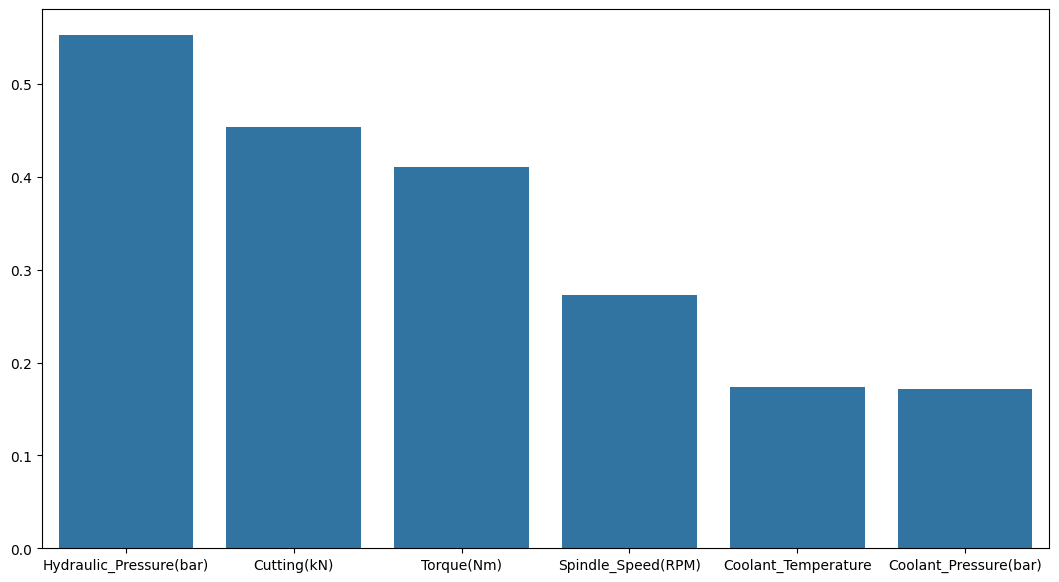

In [ ]:
# Correlation Plot for different Numerical Columns
plt.figure(figsize=(13,7))
sns.barplot(x=top_6_correlated.index,y=top_6_correlated.values)
plt.xlabel('')
plt.show()

**Chart 1 - Proportion of machine downtime occurrences**

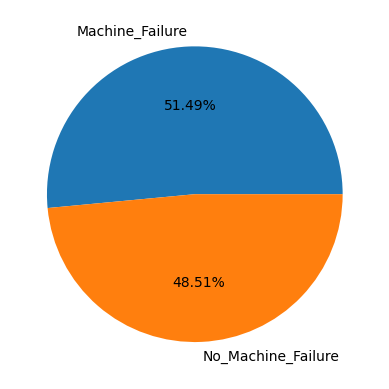

In [ ]:
my_lable=df_cleaned['Downtime'].value_counts().index
plt.pie(df_cleaned['Downtime'].value_counts(),labels=my_lable,autopct='%0.2f%%')
plt.show()

**Chart 2 - Distribution of downtime occurrences across different dates**

In [ ]:
machine_downtime_Failure  = df_cleaned[(df_cleaned.Downtime=="Machine_Failure")]
machine_downtime_Failure.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
machine_downtime_not_failure  = df_cleaned[(df_cleaned.Downtime!="Machine_Failure")]
machine_downtime_not_failure.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
7,2022-03-31,Makino-L3-Unit1-2015,Shopfloor-L3,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,No_Machine_Failure
8,2022-03-31,Makino-L3-Unit1-2015,Shopfloor-L3,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,No_Machine_Failure
21,2022-03-31,Makino-L3-Unit1-2015,Shopfloor-L3,139.671207,5.054400,6.761904,8.7,48.2,41.0,1.168,27.672,20303.0,315.0,23.513865,2.83,No_Machine_Failure
23,2022-03-31,Makino-L3-Unit1-2015,Shopfloor-L3,148.662548,5.057725,6.227789,11.9,49.4,35.3,0.633,24.257,20310.0,355.0,23.505761,2.68,No_Machine_Failure
24,2022-03-31,Makino-L2-Unit1-2015,Shopfloor-L2,131.048192,5.051943,7.050119,5.7,50.4,36.7,1.024,28.519,20298.0,241.0,23.519657,2.90,No_Machine_Failure


In [ ]:
mdf = machine_downtime_Failure.groupby('Date')['Downtime'].count()
mdnf = machine_downtime_not_failure.groupby('Date')['Downtime'].count()

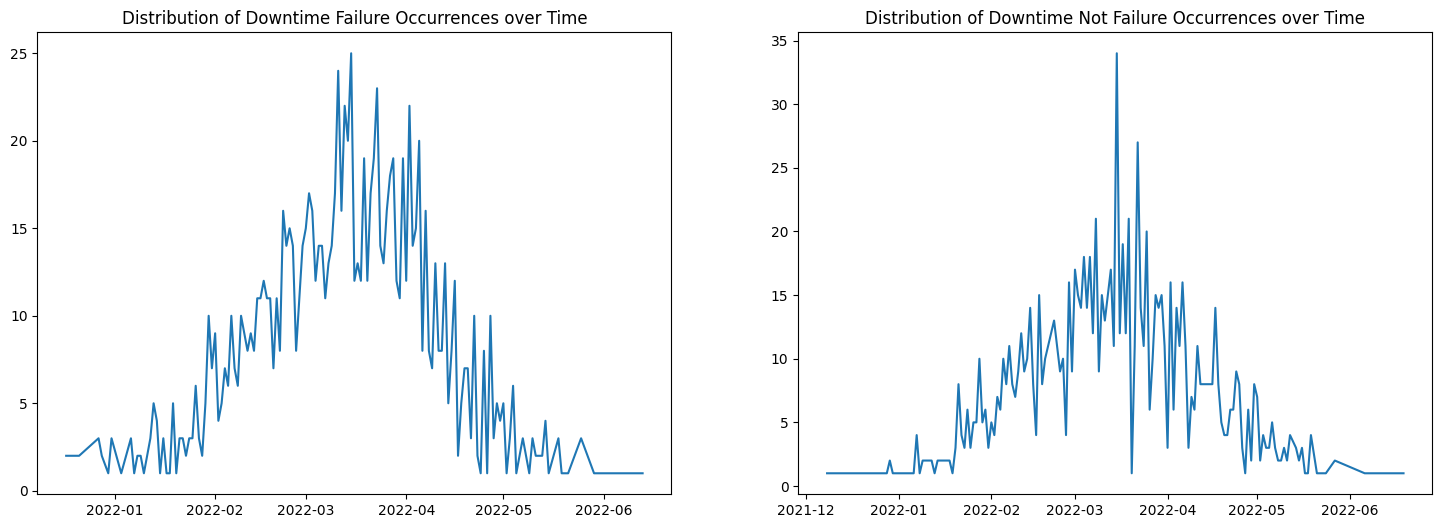

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(mdf.index,mdf.values)
axes[1].plot(mdnf.index,mdnf.values)

axes[0].set_title('Distribution of Downtime Failure Occurrences over Time')
axes[1].set_title('Distribution of Downtime Not Failure Occurrences over Time')
plt.show()

**Chart 3 - Downtime Occurrences by Machine ID**

In [ ]:
mdc_mid_not_fail = machine_downtime_not_failure.groupby('Machine_ID')['Downtime'].count()
mdc_mid_fail = machine_downtime_Failure.groupby('Machine_ID')['Downtime'].count()

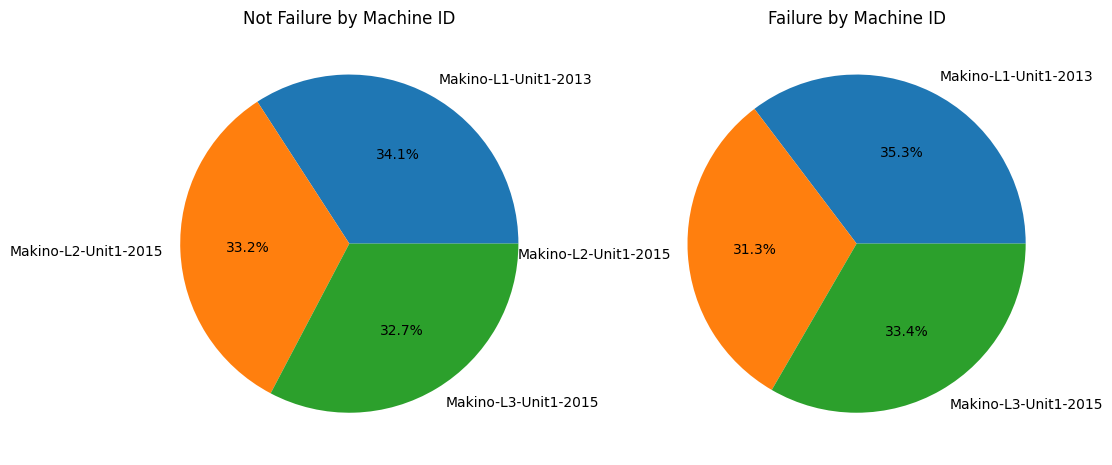

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,7))

axes[0].pie(mdc_mid_not_fail.values, labels=mdc_mid_not_fail.index, autopct='%1.1f%%')
axes[0].set_title('Not Failure by Machine ID')

axes[1].pie(mdc_mid_fail.values, labels=mdc_mid_fail.index, autopct='%1.1f%%')
axes[1].set_title('Failure by Machine ID')

plt.show()

**Chart 4 - Downtime Occurrences by Assembly_Line_No**

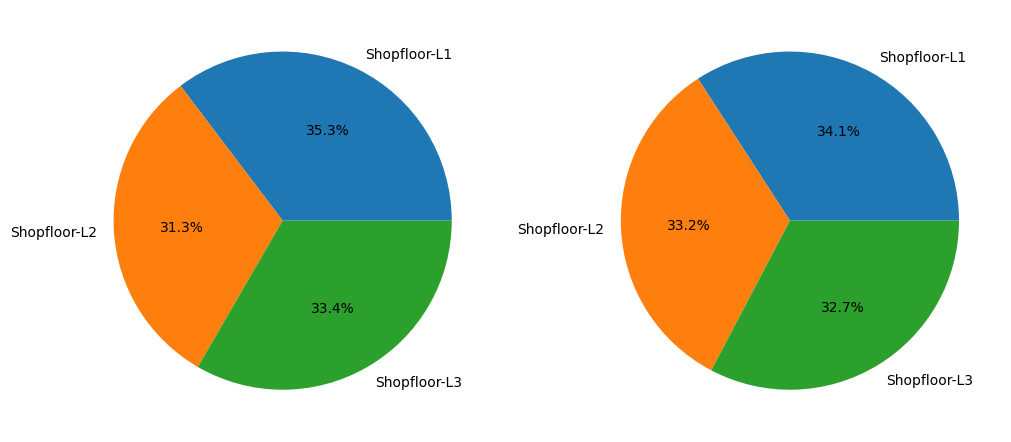

In [ ]:
my_labels_f = machine_downtime_Failure.groupby('Assembly_Line_No')['Downtime'].count().index
my_labels_nf = machine_downtime_not_failure.groupby('Assembly_Line_No')['Downtime'].count().index
fig,axes = plt.subplots(1,2,figsize=(12,7))
axes[0].pie(machine_downtime_Failure.groupby('Assembly_Line_No')['Downtime'].count(),labels=my_labels_f,autopct='%.1f%%')

axes[1].pie(machine_downtime_not_failure.groupby('Assembly_Line_No')['Downtime'].count(),labels=my_labels_nf,autopct='%.1f%%')
plt.show()

**Chart 5 - Assembly_Line_No Count Plot**

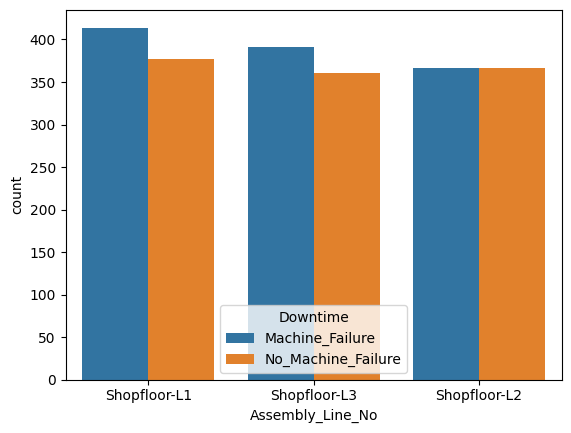

In [ ]:
sns.countplot(x=df_cleaned['Assembly_Line_No'],data=df_cleaned,hue='Downtime')
plt.show()

**Chart 6 - Machine Failure by Spindle Speed**

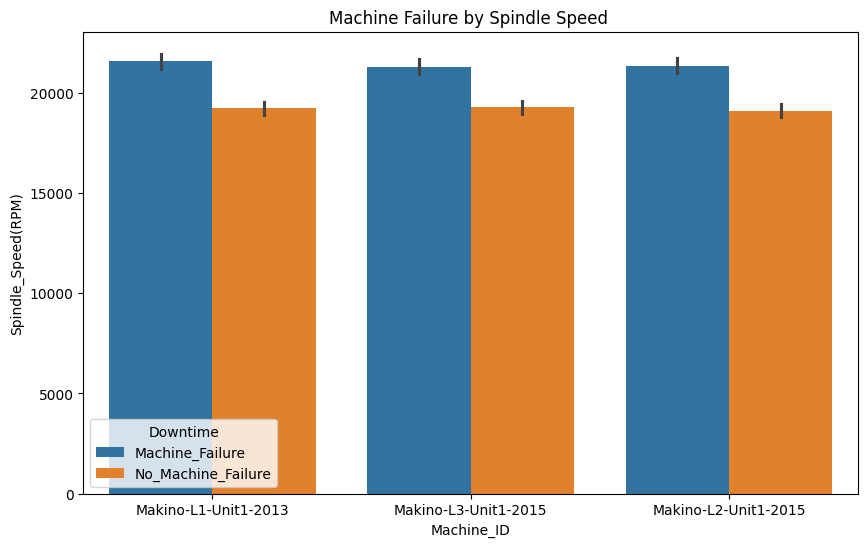

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot( x= 'Machine_ID', y  ='Spindle_Speed(RPM)', data = df_cleaned, hue ='Downtime')
plt.title("Machine Failure by Spindle Speed ")
plt.show()

In [ ]:
machine_downtime_not_failure['Spindle_Speed(RPM)'].mean()

19204.616847826088

**Chart 7 - Count of Downtime by Year**

<ipython-input-48-7e33c2e93d62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['Date'].dt.year


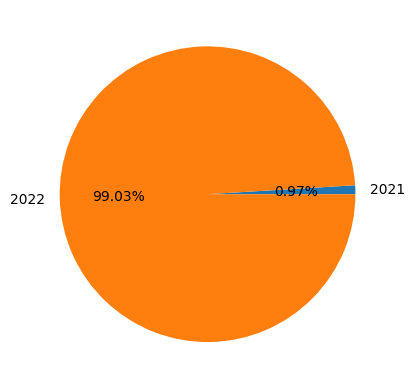

In [ ]:
df_cleaned['year'] = df_cleaned['Date'].dt.year
my_labels = df_cleaned.groupby('year')['Downtime'].count().index
plt.pie(df_cleaned.groupby('year')['Downtime'].count(),labels=my_labels,autopct='%.2f%%')
plt.show()

**Chart 8 - Hydraulic_Pressure histogram Plot**

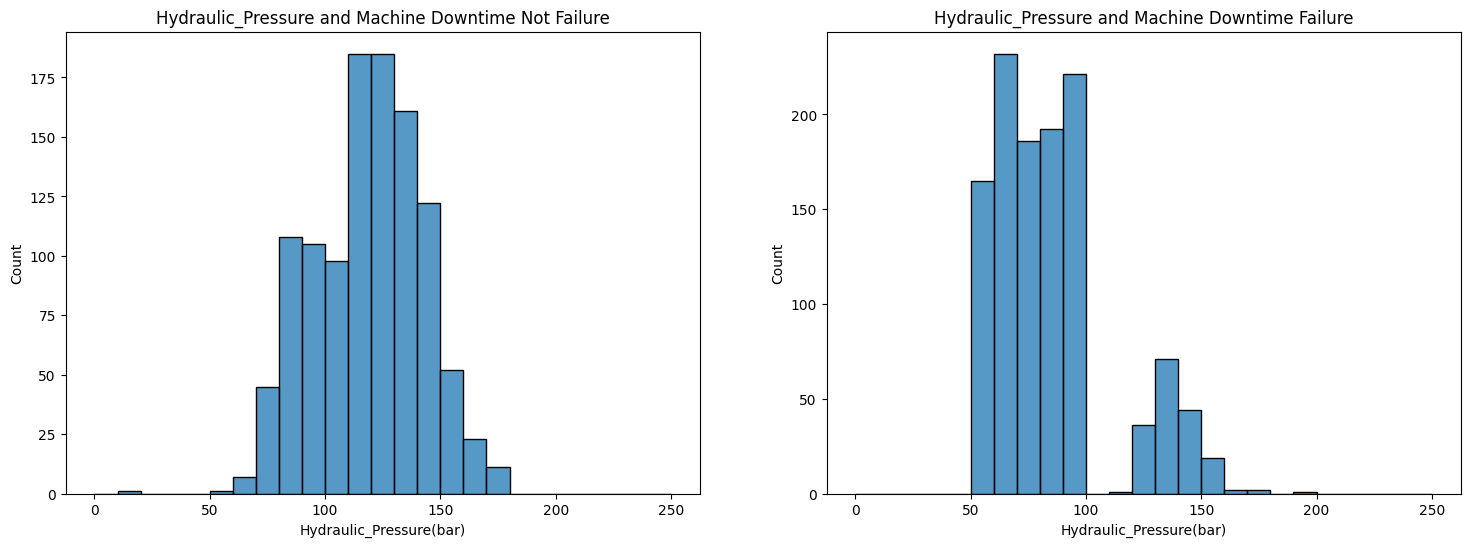

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=machine_downtime_not_failure, x='Hydraulic_Pressure(bar)', bins=range(0,251,10),ax=axes[0])
axes[0].set_title('Hydraulic_Pressure and Machine Downtime Not Failure')

sns.histplot(data=machine_downtime_Failure, x='Hydraulic_Pressure(bar)',ax=axes[1],bins=range(0,251,10))
axes[1].set_title('Hydraulic_Pressure and Machine Downtime Failure')
plt.show()



In [ ]:
machine_downtime_Failure['Hydraulic_Pressure(bar)'].mean()

84.91831911262798

**Chart 9 - Hydraulic_Pressure vs Downtime**

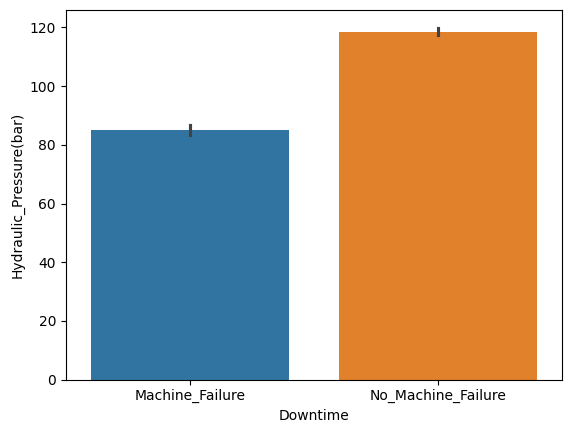

In [ ]:
sns.barplot(data=df_cleaned,x='Downtime',y='Hydraulic_Pressure(bar)',hue='Downtime')
plt.show()

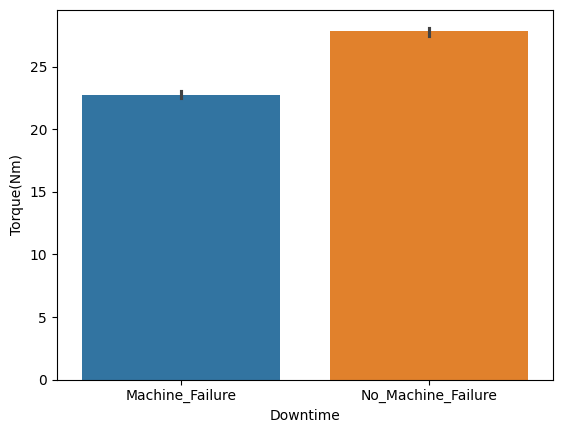

In [ ]:
sns.barplot(data=df_cleaned,x='Downtime',y='Torque(Nm)',hue='Downtime')
plt.show()

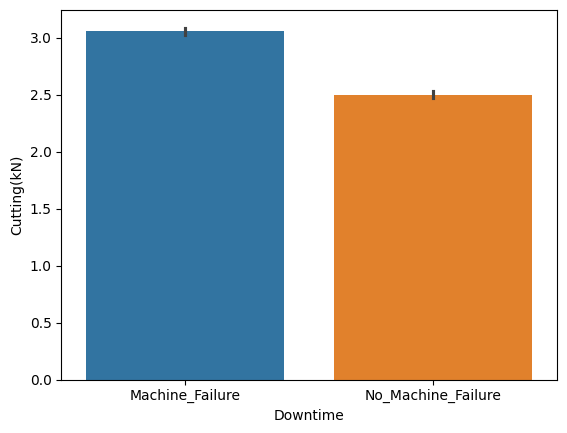

In [ ]:
sns.barplot(data=df_cleaned,x='Downtime',y='Cutting(kN)',hue='Downtime')
plt.show()

**Chart 10 - Hydraulic_Pressure vs Cutting**

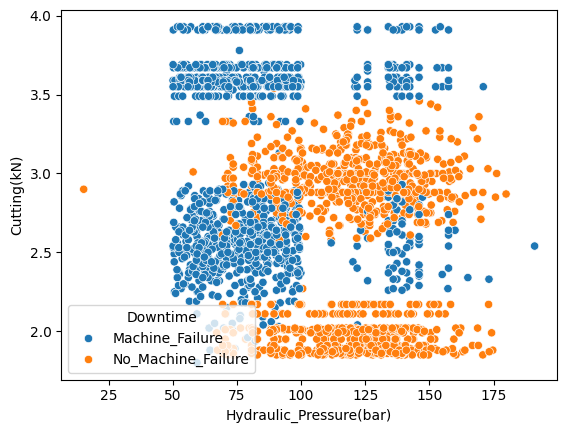

In [ ]:
sns.scatterplot(data=df_cleaned,x='Hydraulic_Pressure(bar)',y='Cutting(kN)',hue='Downtime')
plt.show()

**Chart 11 - Spindle_speed vs Torque**

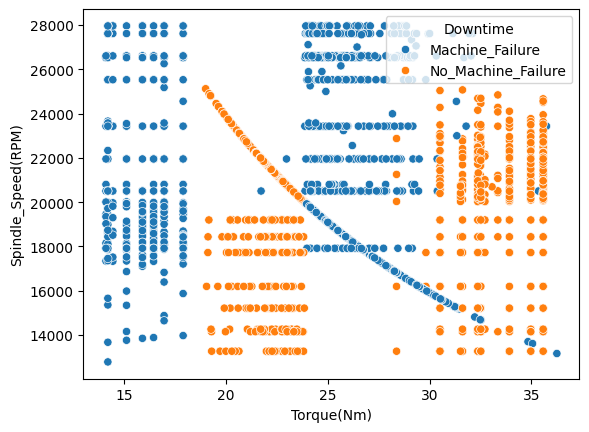

In [ ]:
sns.scatterplot(data=df_cleaned,x='Torque(Nm)',y='Spindle_Speed(RPM)',hue='Downtime')
plt.show()

**Chart 12 - Cutting and Torque**

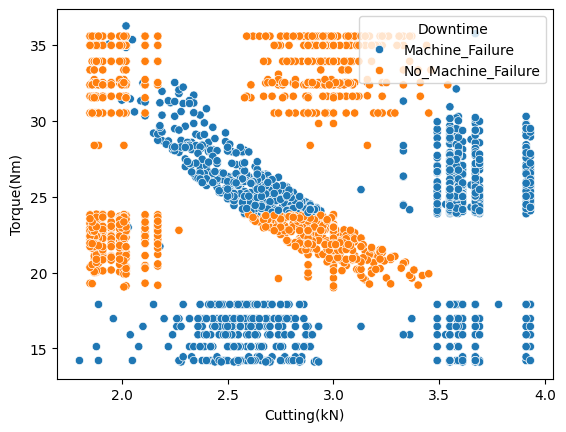

In [ ]:
sns.scatterplot(data=df_cleaned,x='Cutting(kN)',y='Torque(Nm)',hue='Downtime')
plt.show()

**Chart 13 - Coolant_Pressure and Cutting**

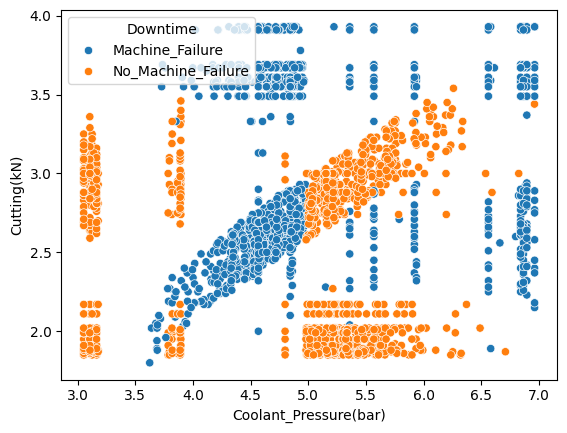

In [ ]:
sns.scatterplot(data=df_cleaned,x='Coolant_Pressure(bar)',y='Cutting(kN)',hue='Downtime')
plt.show()

**Chart 14 - Hydraulic_Pressure JointPlot**

<Figure size 1800x600 with 0 Axes>

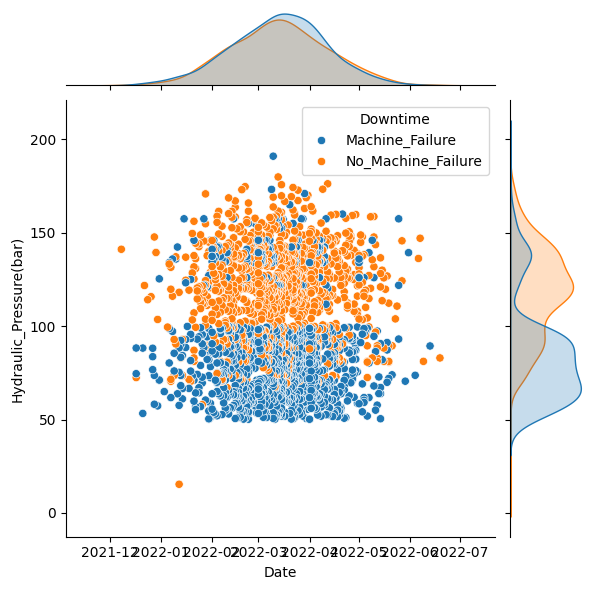

In [ ]:
# Distribution of Hydraulic_Pressure(bar) over time
plt.figure(figsize=(18, 6))
sns.jointplot(x='Date',y='Hydraulic_Pressure(bar)',data=df_cleaned,hue='Downtime')
plt.show()

**Chart 15 - Hydraulic_Pressure and Downtime**

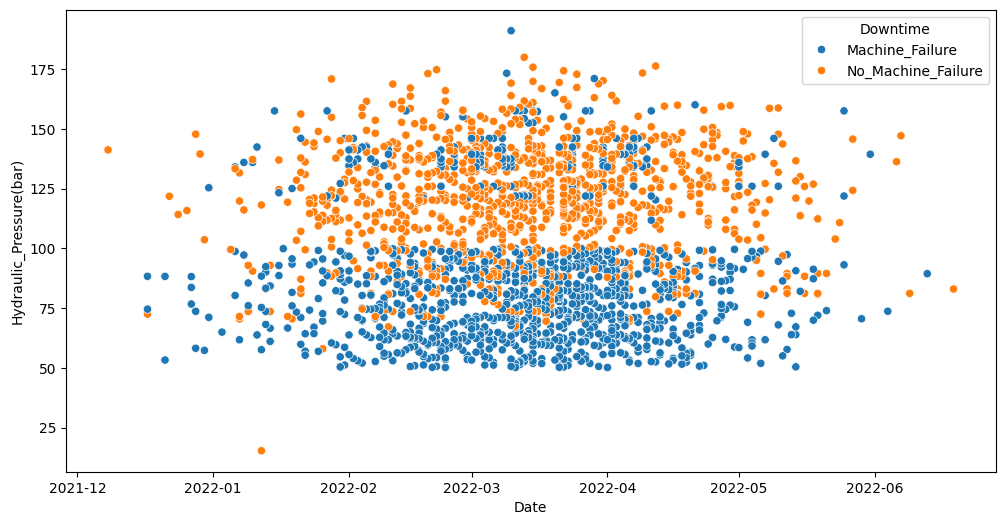

In [ ]:
# Distribution of Hydraulic_Pressure(bar) over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date',y='Hydraulic_Pressure(bar)',data=df_cleaned,hue='Downtime')
plt.show()

**Chart 16 - Cutting and Downtime**

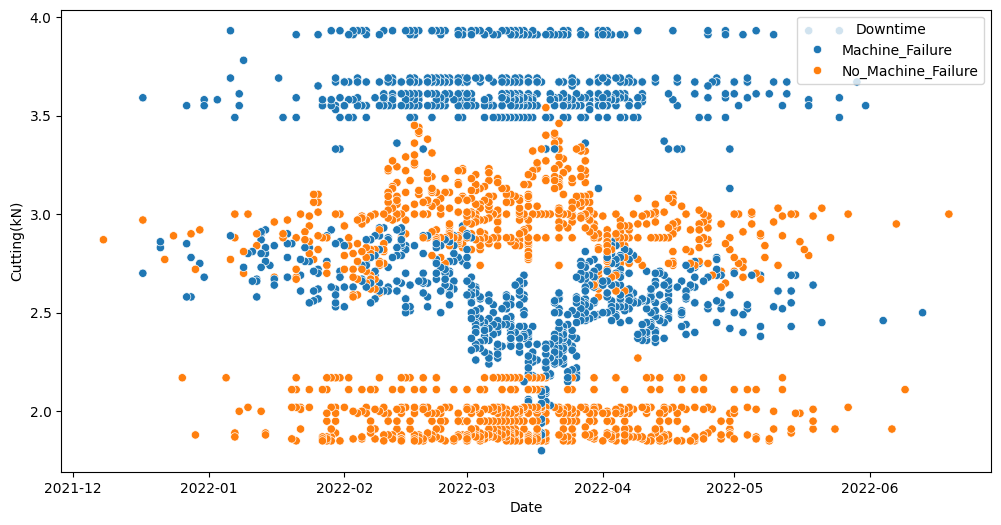

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date',y='Cutting(kN)',data=df_cleaned,hue='Downtime')
plt.show()

**Chart 17 - Torque and Downtime**

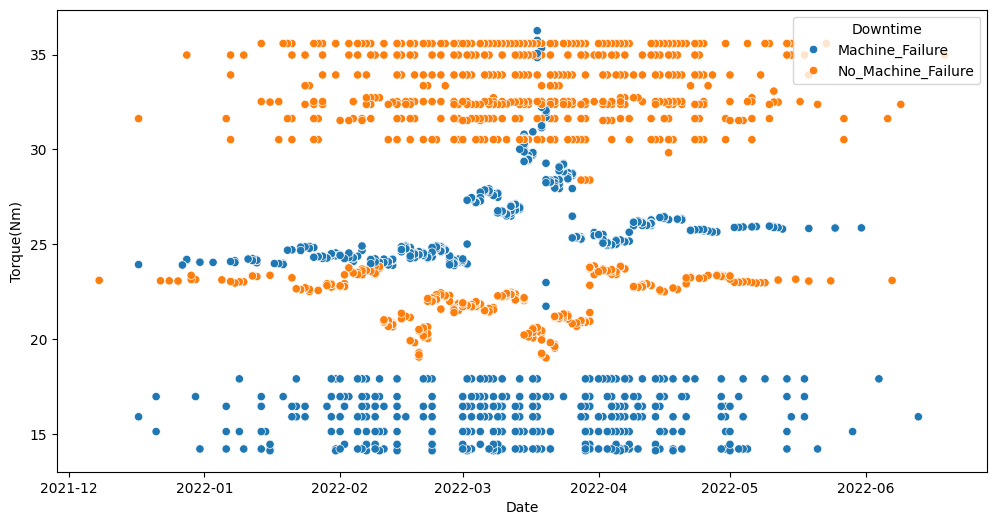

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date',y='Torque(Nm)',data=df_cleaned,hue='Downtime')
plt.show()

**Chart 18 - Coolant_Temperature and Downtime**

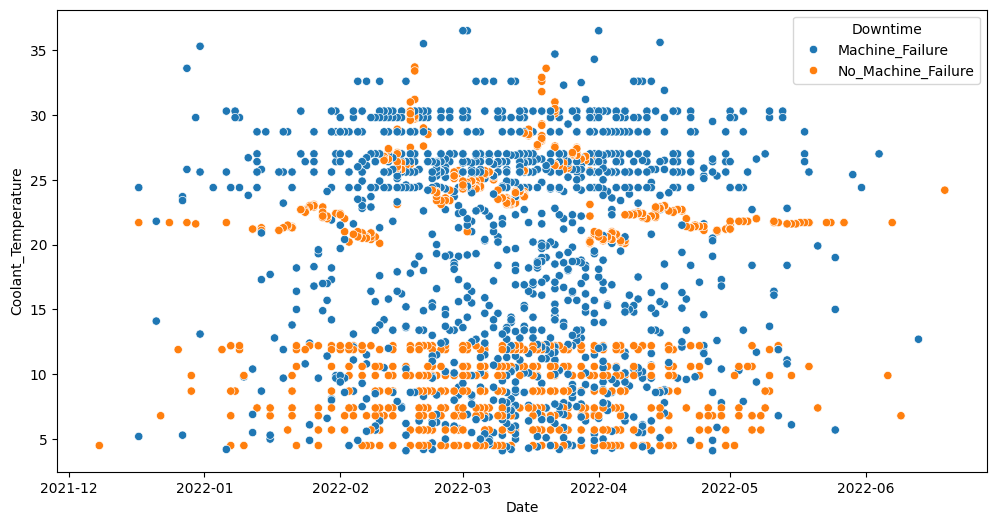

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date',y='Coolant_Temperature',data=df_cleaned,hue='Downtime')
plt.show()

**Chart 19 - HeatMap**

Text(0.5, 1.0, 'Correlation Heatmap visualization')

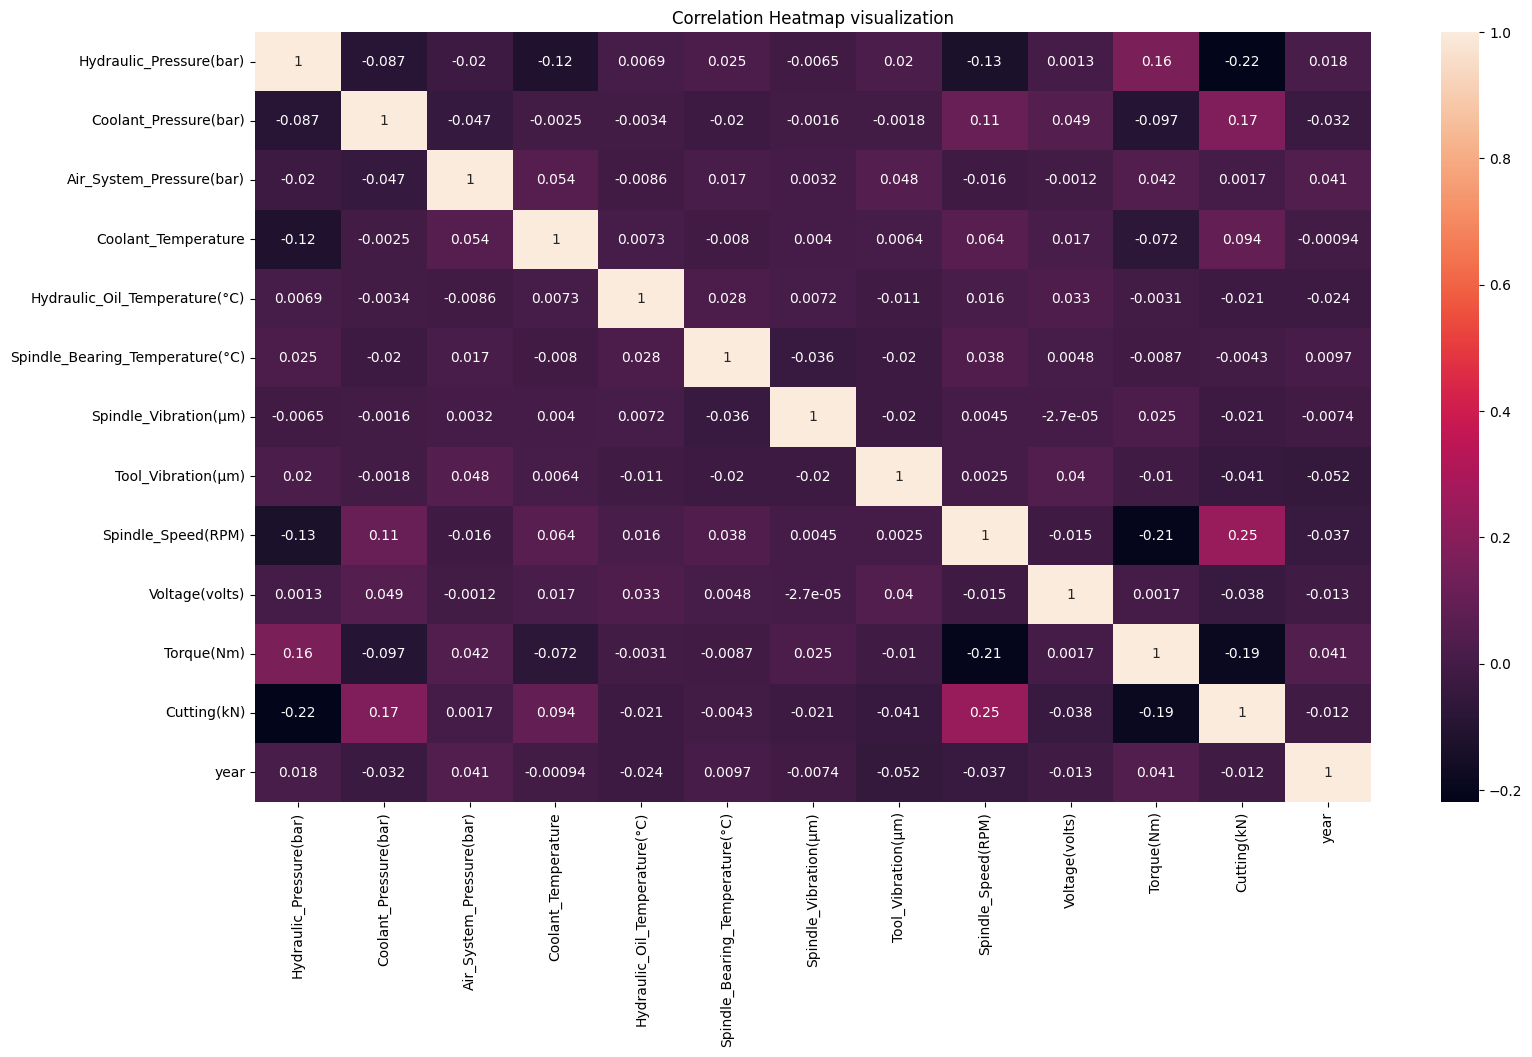

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,10))
numerical_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(),annot=True)
plt.title("Correlation Heatmap visualization")

## Recommendation

Minimizing unplanned machine downtime is crucial for efficiency and productivity. Here are some recommendations:

1) **Implement Predictive Maintenance:** Use historical data and predictive modeling techniques to anticipate equipment failures before they occur. Analyze trends in your parameters (like hydraulic pressure, coolant temperature) to predict maintenance needs.

2) **Real-time Monitoring and Alerts:** Set up real-time monitoring of critical parameters. Implement alerts or alarms that notify operators or maintenance personnel when parameters exceed safe thresholds or deviate from normal operating conditions.

3) **Condition-Based Maintenance:** Instead of relying on fixed schedules, perform maintenance tasks based on the actual condition of the equipment. This approach can prolong the life of components and prevent unexpected failures.

4) **Root Cause Analysis:** Whenever downtime occurs, conduct thorough root cause analysis. Use data analytics to identify the underlying reasons for failures and implement corrective actions to prevent recurrence.

5) **Employee Training and Awareness:** Ensure that operators and maintenance staff are trained in predictive maintenance techniques and the interpretation of monitoring data. Encourage a culture of proactive maintenance and quick response to alerts.

6) **Upgrade Monitoring Technology:** Consider upgrading your monitoring systems to more advanced sensors or IoT devices that provide more accurate and timely data. This can improve the effectiveness of predictive maintenance strategies.

7) **Documentation and Knowledge Management:** Maintain detailed records of maintenance activities, equipment history, and performance data. Use this information to continuously improve maintenance strategies and optimize equipment reliability.